In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dense,Flatten,MaxPooling2D,Activation,Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import time
import json
import cv2
import pandas as pd
import math
from skopt.space import Real, Categorical, Integer
from skopt import gp_minimize
from skopt.utils import use_named_args
from tensorflow.keras.backend import clear_session

AssertionError: Duplicate registrations for type 'experimentalOptimizer'

In [2]:
from pathlib import Path
import imghdr
import shutil
datasetPath=r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\FaceDetectionTheo\Original Images\Original Images/"
datasetPath=r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\FaceDetectionTheo\Original Images\Dataset2"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions
count=0
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(datasetPath).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            shutil.move(filepath,r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\FaceDetectionTheo\Original Images\Error")
            count+=1
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            shutil.move(filepath,r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\FaceDetectionTheo\Original Images\Error")

count

0

In [3]:
input_shape=(224,224)
train_test_split=0.2
seed =32154
batch_size=4
datasetPath=r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\FaceDetectionTheo\Original Images\Dataset2/"
train_ds=tf.keras.utils.image_dataset_from_directory(datasetPath,
                                        color_mode='grayscale',
                                        batch_size=batch_size,
                                        image_size=input_shape,
                                        shuffle=True,
                                        seed=seed,
                                        validation_split=train_test_split,
                                        subset='training')
test_ds=tf.keras.utils.image_dataset_from_directory(datasetPath,
                                        color_mode='grayscale',
                                        batch_size=batch_size,
                                        image_size=input_shape,
                                        shuffle=True,
                                        seed=seed,
                                        validation_split=train_test_split,
                                        subset='validation')
class_names=train_ds.class_names

Found 17534 files belonging to 105 classes.
Using 14028 files for training.
Found 17534 files belonging to 105 classes.
Using 3506 files for validation.


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=input_shape)
for image, label in train_ds.take(1):
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[label.numpy()[0]])
    plt.axis('off')

In [5]:
def create_model(neurons_1=256,has_layer_1=True, has_2_conv_layer_1=True,neurons_2=16,has_layer_2=True,
                 has_2_conv_layer_2=True,neurons_3=256,has_layer_3=True, has_2_conv_layer_3=True,neurons_4=64,
                 has_layer_4=True, has_2_conv_layer_4=True,neurons_5=16,has_layer_5=True, has_2_conv_layer_5=True,
                 drop_1=0.5,drop_2=0.4,drop_3=0.3,drop_4=0.2,drop_5=0.1,dense_1=0.7*len(class_names),
                 dense_2=0.5*len(class_names)):
    _input_shape=(input_shape[0],input_shape[1],3)
    model=Sequential()
    model.add(BatchNormalization(input_shape=_input_shape))
    if has_layer_1:
        model.add(Dropout(drop_1))
        model.add(Conv2D(neurons_1,kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())

    if has_layer_2:
        model.add(Dropout(drop_2))
        model.add(Conv2D(neurons_2,kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())

    if has_layer_3:
        model.add(Dropout(drop_3))
        model.add(Conv2D(neurons_3,kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())

    if has_layer_4:
        model.add(Dropout(drop_4))
        model.add(Conv2D(neurons_4,kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())

    if has_layer_5:
        model.add(Dropout(drop_5))
        model.add(Conv2D(neurons_5,kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
    
    
    
    model.add(Flatten())
    model.add(Dense(dense_1,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(dense_2,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(len(class_names),activation='softmax'))

    model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])
    
    return model

# try:
#     mode=create_model(100000,True,True,256,True,True,256,True,True,256,True,True,256,True,True,0.1,0.1,0.1,0.1,0.1,256,256)
#     mode.fit(train_ds,
#                             epochs=128,
#                             batch_size=16,
#                             validation_data=test_ds,
#                             callbacks=[callback,early_stop])
# except:
#     print("Error")

In [4]:
def create_model(neurons_1=48,neurons_2=128,neurons_3=96, neurons_4=128,neurons_5=48,neurons_6=96,
                 drop_1=0.5,drop_2=0.4,drop_3=0.3,drop_4=0.2,drop_5=0.1,drop_6=0.5,
                 dense_1=256):
    model = Sequential()

    model.add(BatchNormalization( input_shape=(input_shape[0],input_shape[1],1)))


    model.add(Conv2D(neurons_1, kernel_size = (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Dropout(drop_1))
    model.add(Conv2D(neurons_2, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Dropout(drop_2))
    model.add(Conv2D(neurons_3, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Dropout(drop_3))
    model.add(Conv2D(neurons_4, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Dropout(drop_4))
    model.add(Conv2D(neurons_5, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Dropout(drop_5))
    model.add(Conv2D(neurons_6, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dropout(drop_6))
    model.add(Dense(dense_1, activation='relu'))

    model.add(Dense(len(class_names),activation='softmax'))

    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = 'adam',
        metrics = ["accuracy"])
    return model
import matplotlib.pyplot as plt
def plot_graph(history):
    # summarize history for accuracy
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [7]:
callback=tf.keras.callbacks.ModelCheckpoint(
    '../model_best_accuracy.h5',
    monitor='val_accuracy', verbose=0, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch'
)
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.9,
                              patience=20, min_lr=0.000000000000001) 
        

In [8]:
clear_session()

In [9]:

best_accuracy=-1
dim_num_neurons_1 = Integer(low=8, high=256, name='neurons_1')
dim_num_neurons_2 = Integer(low=8, high=256, name='neurons_2')
dim_num_neurons_3= Integer(low=8, high=256, name='neurons_3')
dim_num_neurons_4 = Integer(low=8, high=256, name='neurons_4')
dim_num_neurons_5 = Integer(low=8, high=256, name='neurons_5')
dim_num_neurons_6 = Integer(low=8, high=256, name='neurons_6')


dim_num_dropout_1=Real(low=0.1,high=0.6,name='drop_1')
dim_num_dropout_2=Real(low=0.1,high=0.6,name='drop_2')
dim_num_dropout_3=Real(low=0.1,high=0.6,name='drop_3')
dim_num_dropout_4=Real(low=0.1,high=0.6,name='drop_4')
dim_num_dropout_5=Real(low=0.1,high=0.6,name='drop_5')
dim_num_dropout_6=Real(low=0.1,high=0.6,name='drop_6')


dim_num_dense_1=Integer(low=8,high=512,name='dense_1')


dimensions2 = [dim_num_neurons_1,
                dim_num_neurons_2,
                dim_num_neurons_3,
                dim_num_neurons_4,
                dim_num_neurons_5,
                dim_num_neurons_6,
               
                dim_num_dropout_1,
                dim_num_dropout_2,
                dim_num_dropout_3,
                dim_num_dropout_4,
                dim_num_dropout_5,
                dim_num_dropout_6,
               
                dim_num_dense_1
             ]



default_parameters2 = [48,128,96,128,48,96,0.5,0.4,0.3,0.2,0.1,0.5,256]
@use_named_args(dimensions=dimensions2)
def fitness2(neurons_1=48,neurons_2=128,neurons_3=96, neurons_4=128,neurons_5=48,neurons_6=96,
                 drop_1=0.5,drop_2=0.4,drop_3=0.3,drop_4=0.2,drop_5=0.1,drop_6=0.5,
                 dense_1=256):
    accuracy=0
    try:
        model = create_model(neurons_1=neurons_1,
                             neurons_2=neurons_2,
                             neurons_3=neurons_3,
                             neurons_4=neurons_4,
                             neurons_5=neurons_5,
                             neurons_6=neurons_6,
                             
                             drop_1=drop_1,
                             drop_2=drop_2,
                             drop_3=drop_3,
                             drop_4=drop_4,
                             drop_5=drop_5,
                             drop_6=drop_6,
                             
                             dense_1=dense_1
                            )
        model.summary()

        history = model.fit(train_ds,
                            epochs=128,
                            batch_size=batch_size,
                            validation_data=test_ds,
                            callbacks=[callback]
                           )
        accuracy = history.history['val_accuracy'][-1]

        print()
        print("Accuracy: {0:.2%}".format(accuracy))
        print()
        plot_graph(history.history)
        del model
    except NameError:
        print("NameError")
    except:
         print("Probably Ressource Exhaust")
    finally:
        clear_session()
        return accuracy
# search_result = gp_minimize(func=fitness2,
#                             dimensions=dimensions2,
#                             acq_func='EI', # Expected Improvement.
#                             n_calls=100,
#                             x0=default_parameters2,
#                            )

In [10]:
def make_history(history1,history2):
    history={}
    for key in history1:
        history[key]=history1[key]+history2[key]
    return history

def scheduler(epoch, lr):
    initial_lrate = 0.001
    drop = 0.005
    epochs_drop = 100.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate

In [11]:
model = Sequential()

model.add(BatchNormalization( input_shape=(input_shape[0],input_shape[1],1)))

model.add(Conv2D(64, kernel_size = (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Conv2D(154, kernel_size=(5,5), activation='relu',kernel_regularizer=l2()))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Conv2D(112, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=(5,5), activation='relu',kernel_regularizer=l2()))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Conv2D(72, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',kernel_regularizer=l2()))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(len(class_names),activation='softmax'))

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(),
    metrics = ["accuracy"])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 110, 110, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                        

In [8]:
with open(r"C:\Users\Authentification\PycharmProjects\ProjectFinalDetectionVisage\DetectionVisage\0.8764_0.5431.json", 'r') as fp:
        history=json.load(fp)
# model=tf.keras.models.load_model('../model_best_accuracy.h5')
# model.evaluate(test_ds)

In [12]:
history={}
history=model.fit(train_ds,
            epochs=32,
            batch_size=batch_size,
            validation_data=test_ds,
            callbacks=[callback,reduce_lr]).history
for i in range(32):
    with open('last_history.json', 'w') as fp:
        json.dump(str(history), fp)
    history=make_history(history,model.fit(train_ds,
            epochs=32,
            batch_size=batch_size,
            validation_data=test_ds,
            callbacks=[callback,reduce_lr]).history)
    
    

Epoch 1/32
3507/3507 [==============================] - 173s 47ms/step - loss: 5.6253 - accuracy: 0.0146 - val_loss: 5.0038 - val_accuracy: 0.0174 - lr: 0.0010
Epoch 2/32
3507/3507 [==============================] - 172s 49ms/step - loss: 5.0355 - accuracy: 0.0165 - val_loss: 5.0474 - val_accuracy: 0.0154 - lr: 0.0010
Epoch 3/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.9843 - accuracy: 0.0222 - val_loss: 4.9202 - val_accuracy: 0.0242 - lr: 0.0010
Epoch 4/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.9289 - accuracy: 0.0296 - val_loss: 5.0098 - val_accuracy: 0.0391 - lr: 0.0010
Epoch 5/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.9262 - accuracy: 0.0361 - val_loss: 4.7780 - val_accuracy: 0.0553 - lr: 0.0010
Epoch 6/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.8782 - accuracy: 0.0375 - val_loss: 4.8323 - val_accuracy: 0.0405 - lr: 0.0010
Epoch 7/32
3507/3507 [==================

Epoch 20/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2938 - accuracy: 0.1315 - val_loss: 3.9012 - val_accuracy: 0.2114 - lr: 0.0010
Epoch 21/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.3186 - accuracy: 0.1365 - val_loss: 3.8415 - val_accuracy: 0.2339 - lr: 0.0010
Epoch 22/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2984 - accuracy: 0.1327 - val_loss: 3.8572 - val_accuracy: 0.2074 - lr: 0.0010
Epoch 23/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2913 - accuracy: 0.1320 - val_loss: 3.8856 - val_accuracy: 0.2245 - lr: 0.0010
Epoch 24/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2726 - accuracy: 0.1363 - val_loss: 3.7833 - val_accuracy: 0.2305 - lr: 0.0010
Epoch 25/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2768 - accuracy: 0.1327 - val_loss: 3.6906 - val_accuracy: 0.2661 - lr: 0.0010
Epoch 26/32
3507/3507 [===========

Epoch 7/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2424 - accuracy: 0.1596 - val_loss: 3.8450 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 8/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2460 - accuracy: 0.1609 - val_loss: 3.7281 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 9/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2301 - accuracy: 0.1657 - val_loss: 3.6107 - val_accuracy: 0.2849 - lr: 0.0010
Epoch 10/32
3507/3507 [==============================] - 171s 49ms/step - loss: 4.2527 - accuracy: 0.1598 - val_loss: 3.6460 - val_accuracy: 0.2963 - lr: 0.0010
Epoch 11/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2729 - accuracy: 0.1618 - val_loss: 3.5937 - val_accuracy: 0.3001 - lr: 0.0010
Epoch 12/32
3507/3507 [==============================] - 171s 49ms/step - loss: 4.2460 - accuracy: 0.1578 - val_loss: 3.6043 - val_accuracy: 0.2921 - lr: 0.0010
Epoch 13/32
3507/3507 [==============

Epoch 26/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2301 - accuracy: 0.1763 - val_loss: 3.5343 - val_accuracy: 0.3266 - lr: 0.0010
Epoch 27/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2277 - accuracy: 0.1716 - val_loss: 3.6608 - val_accuracy: 0.3152 - lr: 0.0010
Epoch 28/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2376 - accuracy: 0.1736 - val_loss: 3.5254 - val_accuracy: 0.3408 - lr: 0.0010
Epoch 29/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2432 - accuracy: 0.1786 - val_loss: 3.6682 - val_accuracy: 0.3132 - lr: 0.0010
Epoch 30/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2692 - accuracy: 0.1737 - val_loss: 3.5505 - val_accuracy: 0.3343 - lr: 0.0010
Epoch 31/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.2667 - accuracy: 0.1793 - val_loss: 3.5746 - val_accuracy: 0.3303 - lr: 0.0010
Epoch 32/32
3507/3507 [===========

Epoch 13/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1257 - accuracy: 0.1947 - val_loss: 3.3005 - val_accuracy: 0.3896 - lr: 9.0000e-04
Epoch 14/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1075 - accuracy: 0.1987 - val_loss: 3.3916 - val_accuracy: 0.3620 - lr: 9.0000e-04
Epoch 15/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1260 - accuracy: 0.1943 - val_loss: 3.3845 - val_accuracy: 0.3600 - lr: 9.0000e-04
Epoch 16/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1096 - accuracy: 0.1969 - val_loss: 3.3923 - val_accuracy: 0.3574 - lr: 9.0000e-04
Epoch 17/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1298 - accuracy: 0.1965 - val_loss: 3.5377 - val_accuracy: 0.3351 - lr: 9.0000e-04
Epoch 18/32
3507/3507 [==============================] - 134s 38ms/step - loss: 4.1238 - accuracy: 0.1943 - val_loss: 3.3367 - val_accuracy: 0.3882 - lr: 9.0000e-04
Epoch 19/3

Epoch 31/32
3507/3507 [==============================] - 164s 47ms/step - loss: 4.1034 - accuracy: 0.2052 - val_loss: 3.3736 - val_accuracy: 0.3714 - lr: 9.0000e-04
Epoch 32/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.1203 - accuracy: 0.2015 - val_loss: 3.4324 - val_accuracy: 0.3822 - lr: 9.0000e-04
Epoch 1/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.0569 - accuracy: 0.2076 - val_loss: 3.3428 - val_accuracy: 0.3779 - lr: 8.1000e-04
Epoch 2/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.0579 - accuracy: 0.2082 - val_loss: 3.3247 - val_accuracy: 0.3722 - lr: 8.1000e-04
Epoch 3/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9964 - accuracy: 0.2157 - val_loss: 3.2620 - val_accuracy: 0.3782 - lr: 8.1000e-04
Epoch 4/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.0255 - accuracy: 0.2097 - val_loss: 3.2725 - val_accuracy: 0.3802 - lr: 8.1000e-04
Epoch 5/32
350

Epoch 17/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9909 - accuracy: 0.2238 - val_loss: 3.1144 - val_accuracy: 0.4193 - lr: 8.1000e-04
Epoch 18/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9842 - accuracy: 0.2247 - val_loss: 3.2125 - val_accuracy: 0.4022 - lr: 8.1000e-04
Epoch 19/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9994 - accuracy: 0.2194 - val_loss: 3.1279 - val_accuracy: 0.4139 - lr: 8.1000e-04
Epoch 20/32
3507/3507 [==============================] - 172s 49ms/step - loss: 4.0028 - accuracy: 0.2204 - val_loss: 3.1123 - val_accuracy: 0.4236 - lr: 8.1000e-04
Epoch 21/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9973 - accuracy: 0.2280 - val_loss: 3.2245 - val_accuracy: 0.4064 - lr: 8.1000e-04
Epoch 22/32
3507/3507 [==============================] - 172s 49ms/step - loss: 3.9832 - accuracy: 0.2217 - val_loss: 3.1606 - val_accuracy: 0.4136 - lr: 8.1000e-04
Epoch 23/3

Epoch 3/32
3507/3507 [==============================] - 173s 49ms/step - loss: 4.0152 - accuracy: 0.2267 - val_loss: 3.1966 - val_accuracy: 0.4104 - lr: 8.1000e-04
Epoch 4/32
3507/3507 [==============================] - 173s 49ms/step - loss: 3.9934 - accuracy: 0.2280 - val_loss: 3.2406 - val_accuracy: 0.3848 - lr: 8.1000e-04
Epoch 5/32
3507/3507 [==============================] - 171s 49ms/step - loss: 3.9984 - accuracy: 0.2280 - val_loss: 3.2273 - val_accuracy: 0.4033 - lr: 8.1000e-04
Epoch 6/32
3507/3507 [==============================] - 171s 49ms/step - loss: 4.0139 - accuracy: 0.2253 - val_loss: 3.2197 - val_accuracy: 0.4119 - lr: 8.1000e-04
Epoch 7/32
3507/3507 [==============================] - 171s 49ms/step - loss: 4.0160 - accuracy: 0.2260 - val_loss: 3.1878 - val_accuracy: 0.4258 - lr: 8.1000e-04
Epoch 8/32
3507/3507 [==============================] - 131s 37ms/step - loss: 4.0107 - accuracy: 0.2269 - val_loss: 3.2735 - val_accuracy: 0.4019 - lr: 8.1000e-04
Epoch 9/32
3507/

KeyboardInterrupt: 

In [16]:

model_best=tf.keras.models.load_model('../model_best_accuracy.h5')
model_best.summary()
model_best.evaluate(test_ds)
# with open("last_history.json",'r') as f:
#     file="".join(f.readlines()).replace("\"","").replace("'",'"')
#     history=json.loads(file)
# model_best.summary()
# model_best.fit(train_ds,
#             epochs=16132,
#             batch_size=4,
#             validation_data=test_ds,
#             callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (None, 224, 224, 1)      4         
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 64)      1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 110, 110, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 110, 110, 64)      0         
                                                      

[0.5431250929832458, 0.8762121796607971]

In [77]:
history={}
history=cnn_model.fit(train_ds,
            epochs=256,
            batch_size=batch_size,
            validation_data=test_ds,
            callbacks=[callback]).history

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

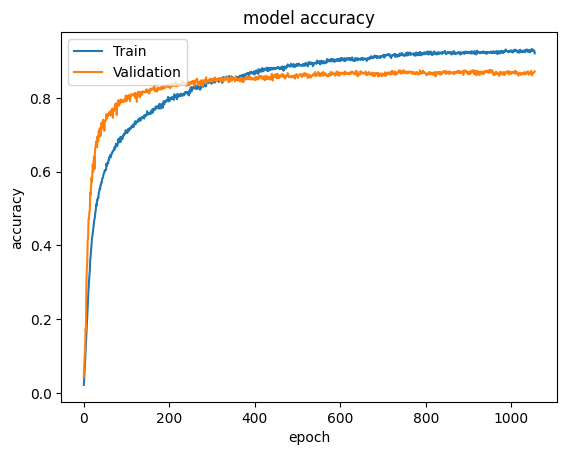

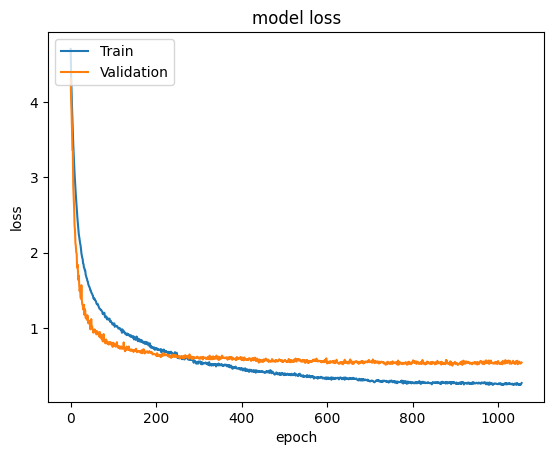

In [9]:

plot_graph(history)

In [14]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch,verbose='0')
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
my_conf_matrix = confusion_matrix(correct_labels, predicted_labels)

NameError: name 'confusion_matrix' is not defined

In [ ]:
import sklearn.metrics as metrics
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(my_conf_matrix)

In [15]:
pd.DataFrame(my_conf_matrix)

NameError: name 'my_conf_matrix' is not defined